In [1]:
%load_ext autoreload
%autoreload 2
from xrayproject.utils import load_train, load_masks
from xrayproject.preprocessing import normalize, flip_resize, resize_test
import xrayproject.utils

In [493]:
path_image = '/Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/ChinaSet_AllFiles/CXR_png/'
path_mask = '/Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask/'

masks, targets, ID = load_masks(10, get_all = False, get_random = True, balanced = True, path = path_mask)

Using path:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask/
Using bucket 
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask/CHNCXR_0526_1_mask.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask/CHNCXR_0517_1_mask.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask/CHNCXR_0575_1_mask.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask/CHNCXR_0363_1_mask.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask/CHNCXR_0362_1_mask.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask/CHNCXR_0019_0_mask.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask/CHNCXR_0160_0_mask.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask/CHNCXR_0138_0_mask.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask

In [495]:
images, ID = load_train(ID, path = path_image )

Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/ChinaSet_AllFiles/CXR_png/CHNCXR_0019_0.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/ChinaSet_AllFiles/CXR_png/CHNCXR_0517_1.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/ChinaSet_AllFiles/CXR_png/CHNCXR_0362_1.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/ChinaSet_AllFiles/CXR_png/CHNCXR_0160_0.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/ChinaSet_AllFiles/CXR_png/CHNCXR_0363_1.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/ChinaSet_AllFiles/CXR_png/CHNCXR_0138_0.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/ChinaSet_AllFiles/CXR_png/CHNCXR_0575_1.png
Loading local file:  /Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/ChinaSet_AllFiles/CXR_png/CHNCXR_0315_0.png
Loading local file:  /Users/kimhedelin/c

In [140]:
for mask in masks:
    if type(mask) == int:
        print(mask)

In [221]:
import tensorflow as tf
image_norm_list = []
mask_norm_list = []
for image, mask in zip(images, masks):
    image_norm, mask_norm = normalize(image, mask)
    image_norm_list.append(image_norm)
    mask_norm_list.append(mask_norm)

In [218]:
t_im = image_norm_list[1]
t_ma = mask_norm_list[1]
np.sum(t_ma[:,:,0])/(t_ma.shape[0] * t_ma.shape[1])

0.2559180385996304

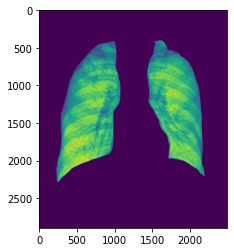

In [190]:
import numpy as np
plt.imshow(t_im[:,:,0:1]*t_ma)

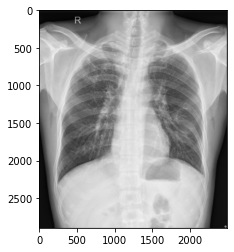

In [195]:
plt.imshow(image_norm_list[1])

In [265]:
img_p_, mask_p_, img_flipped_, mask_flipped_ = flip_resize(images[0], masks[0])

In [ ]:
400 * 

In [293]:
#input_shape = (2897, 2499, 3)
aspect_ratio = 2897/2499
width = 500
input_shape = (int(aspect_ratio * width), width)
input_shape

(579, 500)

In [294]:
img_p, mask_p, img_flipped, mask_flipped = [], [], [],[]
for index in range(len(images)):
    img_p_, mask_p_, img_flipped_, mask_flipped_ = flip_resize(images[index], masks[index], input_shape)
    img_p.append(img_p_)
    mask_p.append(mask_p_)
    img_flipped.append(img_flipped_)
    mask_flipped.append(mask_flipped_)

In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_flipped, targets, test_size=0.25, random_state=42)

In [357]:
def initialize_model(input_shape):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(16, (2,2), input_shape=input_shape, activation="relu"))
    #model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) 

    model.add(tf.keras.layers.Conv2D(16, (2,2) , activation="relu"))
    #model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2))) 

    model.add(tf.keras.layers.Conv2D(32, (2,2) , activation="relu"))
    #model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(20, activation='relu')) # intermediate layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    
    return model

In [358]:
input_shape = (579, 500, 3)
model = initialize_model(input_shape)
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 578, 499, 16)      208       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 577, 498, 16)      1040      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 576, 497, 32)      2080      
_________________________________________________________________
flatten_11 (Flatten)         (None, 9160704)           0         
_________________________________________________________________
dense_22 (Dense)             (None, 20)                183214100 
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 21        
Total params: 183,217,449
Trainable params: 183,217,449
Non-trainable params: 0
_______________________________________

In [345]:
X_train = np.array(X_train)
X_train = X_train.reshape(len(X_train), 579, 500, 3)

X_test = np.array(X_test)
X_test = X_test.reshape(len(X_test), 579, 500, 3)
print(X_train.shape)

(37, 579, 500, 3)


In [346]:
X_test.shape

(13, 579, 500, 3)

In [359]:
model = initialize_model(input_shape)
model.fit(X_train, np.array(y_train),
          validation_data = (X_test, np.array(y_test)),
          epochs=20,  # Use early stop in practice
          batch_size=32, 
          verbose=1)

Epoch 1/20
2/2 [==============================] - 25s 4s/step - loss: 39.9430 - accuracy: 0.3877 - val_loss: 47.4546 - val_accuracy: 0.6154
Epoch 2/20
2/2 [==============================] - 19s 3s/step - loss: 73.3106 - accuracy: 0.4730 - val_loss: 12.1437 - val_accuracy: 0.6154
Epoch 3/20
2/2 [==============================] - 19s 4s/step - loss: 34.5192 - accuracy: 0.3877 - val_loss: 145.7923 - val_accuracy: 0.3846
Epoch 4/20
2/2 [==============================] - 24s 4s/step - loss: 97.6841 - accuracy: 0.5374 - val_loss: 38.3445 - val_accuracy: 0.3846
Epoch 5/20
2/2 [==============================] - 21s 3s/step - loss: 20.8531 - accuracy: 0.5270 - val_loss: 31.4036 - val_accuracy: 0.6154
Epoch 6/20
2/2 [==============================] - 21s 4s/step - loss: 46.9017 - accuracy: 0.4521 - val_loss: 26.5603 - val_accuracy: 0.6154
Epoch 7/20
2/2 [==============================] - 21s 5s/step - loss: 35.0313 - accuracy: 0.4730 - val_loss: 2.6424 - val_accuracy: 0.9231
Epoch 8/20
2/2 [====

In [355]:
np.sum(y_test)/len(y_test)

0.38461538461538464

In [332]:
type(X_train[1,1,1])

numpy.ndarray

In [316]:
for x in X_train:
    print(x)
    np.append(X_train_, x)

tf.Tensor(
[[[0.06941788 0.06941788 0.06941788]
  [0.07107078 0.07107078 0.07107078]
  [0.07557087 0.07557087 0.07557087]
  ...
  [0.05827668 0.05827668 0.05827668]
  [0.06402373 0.06402373 0.06402373]
  [0.05801524 0.05801524 0.05801524]]

 [[0.06638748 0.06638748 0.06638748]
  [0.07538863 0.07538863 0.07538863]
  [0.07085075 0.07085075 0.07085075]
  ...
  [0.06010363 0.06010363 0.06010363]
  [0.05569921 0.05569921 0.05569921]
  [0.06111797 0.06111797 0.06111797]]

 [[0.06769302 0.06769302 0.06769302]
  [0.07487234 0.07487234 0.07487234]
  [0.07161719 0.07161719 0.07161719]
  ...
  [0.07274412 0.07274412 0.07274412]
  [0.05972615 0.05972615 0.05972615]
  [0.05942576 0.05942576 0.05942576]]

 ...

 [[0.10451768 0.10451768 0.10451768]
  [0.02352538 0.02352538 0.02352538]
  [1.         1.         1.        ]
  ...
  [0.09293088 0.09293088 0.09293088]
  [0.09465923 0.09465923 0.09465923]
  [0.0829953  0.0829953  0.0829953 ]]

 [[0.0977788  0.0977788  0.0977788 ]
  [0.10164577 0.10164577 0

In [315]:
X_train_

array([], dtype=float64)

In [371]:
masks, targets, ID = load_masks(50, get_all = False, get_random = True, balanced = True, path = path_mask)
images, ID = load_train(path_image, ID )
img_p, mask_p, img_flipped, mask_flipped = [], [], [],[]
for index in range(len(images)):
    img_p_, mask_p_, img_flipped_, mask_flipped_ = flip_resize(images[index], masks[index], (579, 500))
    img_p.append(img_p_)
    mask_p.append(mask_p_)
    img_flipped.append(img_flipped_)
    mask_flipped.append(mask_flipped_)

In [372]:
X_test_ = np.array(img_p)
X_test_ = X_test_.reshape(len(X_test_), 579, 500, 3)

In [373]:
X_test_.shape

(50, 579, 500, 3)

In [375]:
np.array(targets)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [376]:
pred = model.predict(X_test_)

In [381]:
pred = [int(i) for i in pred]


In [383]:
sum(pred) / sum(targets)

0.68

In [382]:
recall = sum(pred[0:25])/ sum(targets[0:25])
recall

0.6

In [389]:
from xrayproject.baseline import Baseline

In [409]:
model = Baseline((579, 500, 3))

In [410]:
model.train(images, masks, targets)

1/1 [==============================] - 10s 10s/step - loss: 0.6932 - accuracy: 0.5714 - val_loss: 228.8805 - val_accuracy: 0.3333


In [412]:
model.model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 578, 499, 16)      208       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 577, 498, 16)      1040      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 576, 497, 32)      2080      
_________________________________________________________________
flatten_15 (Flatten)         (None, 9160704)           0         
_________________________________________________________________
dense_30 (Dense)             (None, 20)                183214100 
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 21        
Total params: 183,217,449
Trainable params: 183,217,449
Non-trainable params: 0
_______________________________________

In [413]:
model2 = Baseline((579, 500, 3))

In [418]:
import pandas as pd
p = 'gs://wagon-data-627-hedelin/data/mask/'
for dirname, _, filenames in os.walk(p):
    print(dirname)

In [2]:
masks, targets, ID = load_masks(10, get_all = False, get_random = True, balanced = True, bucket_name = 'wagon-data-627-hedelin')

Using path:  
Using bucket wagon-data-627-hedelin
Generating list of filenames...
Loading blob:  gs://wagon-data-627-hedelin/data/mask/CHNCXR_0330_1_mask.png
Loading blob:  gs://wagon-data-627-hedelin/data/mask/CHNCXR_0539_1_mask.png
Loading blob:  gs://wagon-data-627-hedelin/data/mask/CHNCXR_0452_1_mask.png
Loading blob:  gs://wagon-data-627-hedelin/data/mask/CHNCXR_0568_1_mask.png
Loading blob:  gs://wagon-data-627-hedelin/data/mask/CHNCXR_0514_1_mask.png
Loading blob:  gs://wagon-data-627-hedelin/data/mask/CHNCXR_0228_0_mask.png
Loading blob:  gs://wagon-data-627-hedelin/data/mask/CHNCXR_0163_0_mask.png
Loading blob:  gs://wagon-data-627-hedelin/data/mask/CHNCXR_0104_0_mask.png
Loading blob:  gs://wagon-data-627-hedelin/data/mask/CHNCXR_0273_0_mask.png
Loading blob:  gs://wagon-data-627-hedelin/data/mask/CHNCXR_0101_0_mask.png


In [497]:
images, ID = load_train(ID, bucket_name = 'wagon-data-627-hedelin')

Generating list of filenames...
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0001_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0002_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0003_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0004_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0005_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0006_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0007_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0008_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0009_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0010_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0011_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0012_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0013_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0014_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0015_0.png
gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0016_0.png
gs://wagon-data-627-hede

Loading blob:  gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0149_0.png
Loading blob:  gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0243_0.png
Loading blob:  gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0273_0.png
Loading blob:  gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0285_0.png
Loading blob:  gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0331_1.png
Loading blob:  gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0405_1.png
Loading blob:  gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0428_1.png
Loading blob:  gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0538_1.png
Loading blob:  gs://wagon-data-627-hedelin/data/CXR_png/CHNCXR_0619_1.png


In [498]:
ID

[619, 331, 538, 405, 428, 273, 285, 96, 149, 243]

In [421]:
import cv2
cv2.imread('gs://wagon-data-627-hedelin/data/mask/')

In [483]:
from google.cloud import storage
bucket_name = 'wagon-data-627-hedelin'
storage_client = storage.Client()
blobs = storage_client.list_blobs(bucket_name, prefix='data/mask/', delimiter='/')
for blob in list(blobs):
    name = 'gs://'+bucket_name+ '/' + blob.name
    if name.endswith('.png'):
        print(name)


gs://wagon-data-627-hedelin/data/mask/CHNCXR_0001_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0002_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0003_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0004_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0005_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0006_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0007_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0008_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0009_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0010_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0011_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0012_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0013_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0014_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0015_0_mask.png
gs://wagon-data-627-hedelin/data/mask/CHNCXR_0016_0_mask.png
gs://wagon-data-627-hede

In [443]:
with tf.io.gfile.GFile('gs://wagon-data-627-hedelin/data/mask/CHNCXR_0661_1_mask.png', "rb") as f:
        image = f.read()
        #content = tf.io.decode_png(image)
        img = tf.io.decode_png(image)

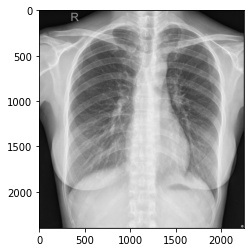

In [499]:
plt.imshow(images[0])

In [503]:
import joblib
joblib.dump(model.model, 'model1.joblib')

TypeError: cannot pickle 'weakref' object

In [504]:
from joblib import wrap_non_picklable_objects

In [505]:
wrap_non_picklable_objects(model.model)

In [511]:
!pip install dill

     |████████████████████████████████| 81 kB 2.0 MB/s eta 0:00:011
You should consider upgrading via the '/Users/kimhedelin/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [521]:
# Hotfix function
import pickle
import tempfile
from tensorflow.keras.models import Sequential, load_model, save_model, Model


def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = {'model_str': model_str}
        return d    
    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = load_model(fd.name)
        self.__dict__ = model.__dict__    
    
    cls = Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__# Run the function
    
make_keras_picklable()

In [522]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model.model, f)

In [527]:
from tensorflow.keras.models import Sequential, model_from_json
# saving model
json_model = model.model.to_json()
open('model_architecture.json', 'w').write(json_model)
# saving weights
model.model.save_weights('model_weights.h5', overwrite=True)

In [548]:
client = storage.Client()                                                      
bucket = client.bucket(bucket_name)                                            
blob = bucket.blob('models/model2_architecture.json')
#blob.upload_from_filename('model_architecture.json')
#blob.upload_from_filename('model_weights.h5')
blob

<Blob: wagon-data-627-hedelin, models/model2_architecture.json, None>

In [546]:
blob.name

'models/model_architecture.json'

In [549]:
blob.upload_from_filename('model_architecture.json')

In [590]:
model = model_from_json(open('model_architecture.json').read())
model.load_weights('model_weights.h5')# dont forget to compile your model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [597]:
im, ma, im_flipped, ma_flipped = flip_resize(images[7], masks[0], (579, 500))
image_pred = np.expand_dims(im, axis = 0)

In [598]:
image_pred.shape
str(model.predict(image_pred))

'[[1.]]'

In [593]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 578, 499, 16)      208       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 577, 498, 16)      1040      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 576, 497, 32)      2080      
_________________________________________________________________
flatten_15 (Flatten)         (None, 9160704)           0         
_________________________________________________________________
dense_30 (Dense)             (None, 20)                183214100 
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 21        
Total params: 183,217,449
Trainable params: 183,217,449
Non-trainable params: 0
_______________________________________

In [594]:
targets

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]